# Random Forest Example with Scikit Learn

Random forest is a trademark term for an ensemble of decision trees. In a random forest, we have a collection of decision trees known as a forest. To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification with the most votes (over all the trees in the forest).
__Random Forests__ have gained popularity in applications as they offer good classification perfromance, scalability and ease of use. They combining weak learners to build a more robust strong learner model. This model should have a better generalisation error and is less susceptible to overfitting.

1. Draw a random bootstrap sample of size _n_
2. Grow a decision tree from the bootstrap sample. At each node
    * Randomly select _d_ features without replacement
    * Split the node using the feature that provides the best split according to the objective function3. Repeat steps 
3. Repeat steps 1 and 3 _m_ times
4. Aggregate the prediction by each tree to assign the class label using majority vote
    

When we training each tree in step 2 all features are _not_ evalauated, just a random subset. The forest is quite robust to noise from individual decision trees and so pruning is usually not required. The key paramter to consider in practise in the number of trees _m_. As teh numbe rof trees increases the better the performance, but at the cost of increased computational requirements. 

Controlling teh sample size _n_ we control the bias-variance tradeoff - larger sample sizes will reduce randomness and the forest is more likely to overfit. Reducing _n_ reduces the risk of overfitting but reduces the model performance. In most implementations the sample size _n_ is chosen to be equal to the number of samples in the original training set. A reasonable choice for the number of features at each split _d_ is $\sqrt{m}$ where _m_ is the total number of features.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.ensemble import RandomForestClassifier
import scikit_utilities as ut

In [14]:
X_train_std, y_train, X_test_std, y_test, X_combined_std, y_combined, X_train, X_test = ut.get_iris_data()

[0 1 2]
Training Data set is 105 values long


Lets train 10 decision trees using the entropy crierion as an impurity measure to split the nodes. n_jobs allows us to parallelise the model training using multiple cores. 

In [9]:
forest = RandomForestClassifier(criterion='entropy', n_estimators = 10, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [11]:
X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((y_train, y_test))

In [12]:
plt=ut.plot_decision_regions(X_combined, Y_combined, classifier=forest, test_idx=range(105,150))

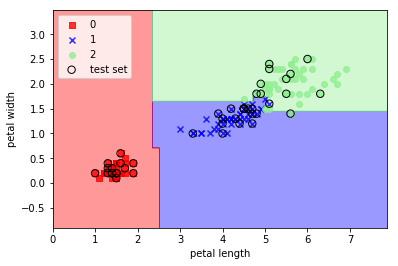

In [13]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()
